# Using Health Factors to Predict Heart Disease Diagnosis

## 1. Introduction

Heart disease comprises a variety of conditions that affect the heart such as coronary heart disease (blood vessel narrowing), arrhythmia (abnormal heartbeat), cardiomyopathy (heart muscle disease), and more (Mayo Foundation for Medical Education and Research, 2022). There are many risk factors associated with the disease including high cholesterol, high blood pressure, obesity, and smoking. Heart disease is the leading cause of death in the United States and the second leading cause of death in Canada (Centers for Disease Control and Prevention, 2023; Government of Canada, 2022). Due to its prevalence, conducting data analyses such as the following are important so we can better understand one’s risk for the disease and take early steps to prevent or treat it. 

The question we will be trying to answer with this analysis is: Can health factors be used to predict heart disease diagnosis?

To answer this question, we will be using the Cleveland dataset in the Heart Disease database from UC Irvine Machine Learning Repository (Janosi et al., 1988). This dataset originally contained 76 attributes; however, only 14 of them were used: age, sex, chest pain (cp), resting blood pressure (trestbps), cholesterol (chol), fasting blood sugar (fbs), electrocardiogram reading at rest (restecg), maximum heart rate (thalach), exercise induced angina (exang), ST depression induced by exercise (oldpeak), exercise segment slope (slope), number of major vessels coloured by fluoroscopy (ca), heart condition (thal), and diagnosis of heart disease (num). We used our preliminary analysis to narrow this list down to age, maximum heart rate and ST depression induced by exercise. Through classification techniques such as K-nearest neighbours, we will use these variables to predict diagnosis of heart disease. 

## 2. Methods

Our final goal is to create a K nearest neighbours (KNN) classification model that predicts the 'heart_disease_diagnosis' using the predictor variable that we choose to be optimal. We will do this through the following steps:
1. Read-in the dataset from the URL.
2. Tidy the dataset.
3. Split the data into training and testing datasets.
4. Analyze the dataset using box plots to determine which variable has the optimal significance. By plotting different variables in the training dataset we can see how different variables vary in range over different 'heart_disease_diagnosis' categories.
5. Find the optimal $k$ value using cross validation and build the model.
6. Evaluate the model.
7. Present conclusions and takeaways from our model.

## 3. Data Analysis

### A. Loading library packages and reading in the data

In [1]:
library(tidyverse)
library(ggplot2)
library(cowplot)
library(tidymodels)
library(repr)

install.packages("themis")
library(themis)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“package ‘cowplot’ was built under R version 4.3.2”

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1

In [2]:
#let's read the data in from online
heart_disease <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data")
colnames(heart_disease) <- c("age", "sex", "chest_pain", "trest_bps", "chol", "fbs", "resting_ecg", 
                             "max_hr", "exer_agina", "st_depr", "exercise_segment_slope", 
                             "num_major_vessels", "heart_condition", "disease_diagnosis")
heart_disease

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain,trest_bps,chol,fbs,resting_ecg,max_hr,exer_agina,st_depr,exercise_segment_slope,num_major_vessels,heart_condition,disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


#### Table 1: Heart Disease Dataset

We began our analysis by loading the required library packages and then read our data into R using the url directly. We labelled the 14 column names of the tibble that contains 302 rows in total.

### B. Tidying the dataset

In [23]:
# Let's clean up the table by giving the categorical names to the values 
# of the variables which should be factors

heart_disease <- heart_disease |>
                mutate(disease_diagnosis = as.factor(disease_diagnosis)) 
heart_disease

age,sex,chest_pain,trest_bps,chol,fbs,resting_ecg,max_hr,exer_agina,st_depr,exercise_segment_slope,num_major_vessels,heart_condition,disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


#### Table 2: Mutated Heart Disease Dataset

Using the `as_factor()` function, we mutated the disease diagnosis column so that it is now a factor.  

One thing we notice in the dataframe is that there are very few observations that have the "severe" diagnosis for heart disease (denoted as 4). In fact, it looks like most of the observations say that the patient has no disease; this is something we will have to keep in mind when constructing our KNN-classification model later.

In [24]:
# we do not need all of these variables, so let's take the ones that seem most useful
heart_select <- heart_disease |>
            select(age, trest_bps, chol, max_hr, st_depr, disease_diagnosis)
glimpse(heart_select)

Rows: 302
Columns: 6
$ age               <dbl> 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44, …
$ trest_bps         <dbl> 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 14…
$ chol              <dbl> 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 29…
$ max_hr            <dbl> 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 15…
$ st_depr           <dbl> 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4, 1.…
$ disease_diagnosis <fct> 2, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0…


#### Table 3: Refined Heart Disease Dataset

Based on Table 2, we determined which of the 14 attributes would be most useful in our data analysis. Using the select function, we decided to further evaluate age, resting blood pressure, cholesterol, maximum heart rate, ST depression induced by exercise, and our response variable, disease diagnosis. We excluded the categorical variables as we do not consider them as predictors for this analysis.

In [5]:
#Let's see if there are any N/A values for the variable we want to predict (heart disease diagnosis)

heart_disease_na <- filter(heart_select, disease_diagnosis ==  NA, age == NA, trest_bps == NA, chol == NA, max_hr == NA, st_depr == NA)
heart_disease_na

age,trest_bps,chol,max_hr,st_depr,disease_diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>


#### Table 4: Filtering for N/A Values

Next, we used the filter function to determine the amount of N/A values in our response variable and predictors. Based on figure 2.2, we can see that heart_disease_diagnosis has no rows with N/A values. 

### C. Splitting data for training and testing

In [26]:
set.seed(90) 
# Let's do a 75% split into training data and 25% into testing.

heart_split <- initial_split(heart_select, prop = 0.75, strata = disease_diagnosis)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

### D. Analyzing training data

In [27]:
instances <- heart_training |>
    group_by(disease_diagnosis) |>
    summarize(instances = n())
instances

disease_diagnosis,instances
<fct>,<int>
0,122
1,40
2,27
3,25
4,11


#### Table 5: Summary of Disease Diagnosis in Training Data

Next we looked at the instances of disease diagnosis in our training set using the group_by and summarize functions. This allows us to count the occurrence of each disease diagnosis category. We see that most of the diagnosis are of the "no disease" category with very few in the "severe" category. This aligns with our initial observation in the dataset before splitting. 

Let's now look into the mean values of the predictors for each category. 

In [8]:
mean_values <- heart_training |>
    group_by(disease_diagnosis) |>
    summarize(age_mean = mean(age),
             trest_bps_mean = mean(trest_bps),
             chol_mean = mean(chol),
             max_hr_mean = mean(max_hr),
            st_depr_mean = mean(st_depr))

mean_values

disease_diagnosis,age_mean,trest_bps_mean,chol_mean,max_hr_mean,st_depr_mean
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,52.89344,129.4180,243.5902,158.8770,0.5852459
1,54.95000,135.7500,244.6750,144.8000,1.0250000
2,58.92593,134.0370,264.2222,135.0370,1.7407407
3,56.80000,137.6400,246.2400,132.0000,1.9760000
4,58.45455,137.1818,246.6364,140.8182,2.1909091


#### Table 6: Summary of Predictor Variable Means

We used the group_by and summarize functions to calculate the means of our predictor variables in relation to disease diagnosis. From this step we notice that:
* There might be a positive relationship between ST depression induced by exercise(st_depr_mean) and the diagnosis
* The maximum heart rate for patients without heart disease is higher compared to those diagnosed with heart disease.
* The mean values for most predictor values are close to each other indicating that if there is any relationship between predictor value and diagnosis, it is not very strong.

In order for us to determine how we should choose our predictors for our KNN-classification, let's check the distribution of each potential predictor against heart disease diagnosis.

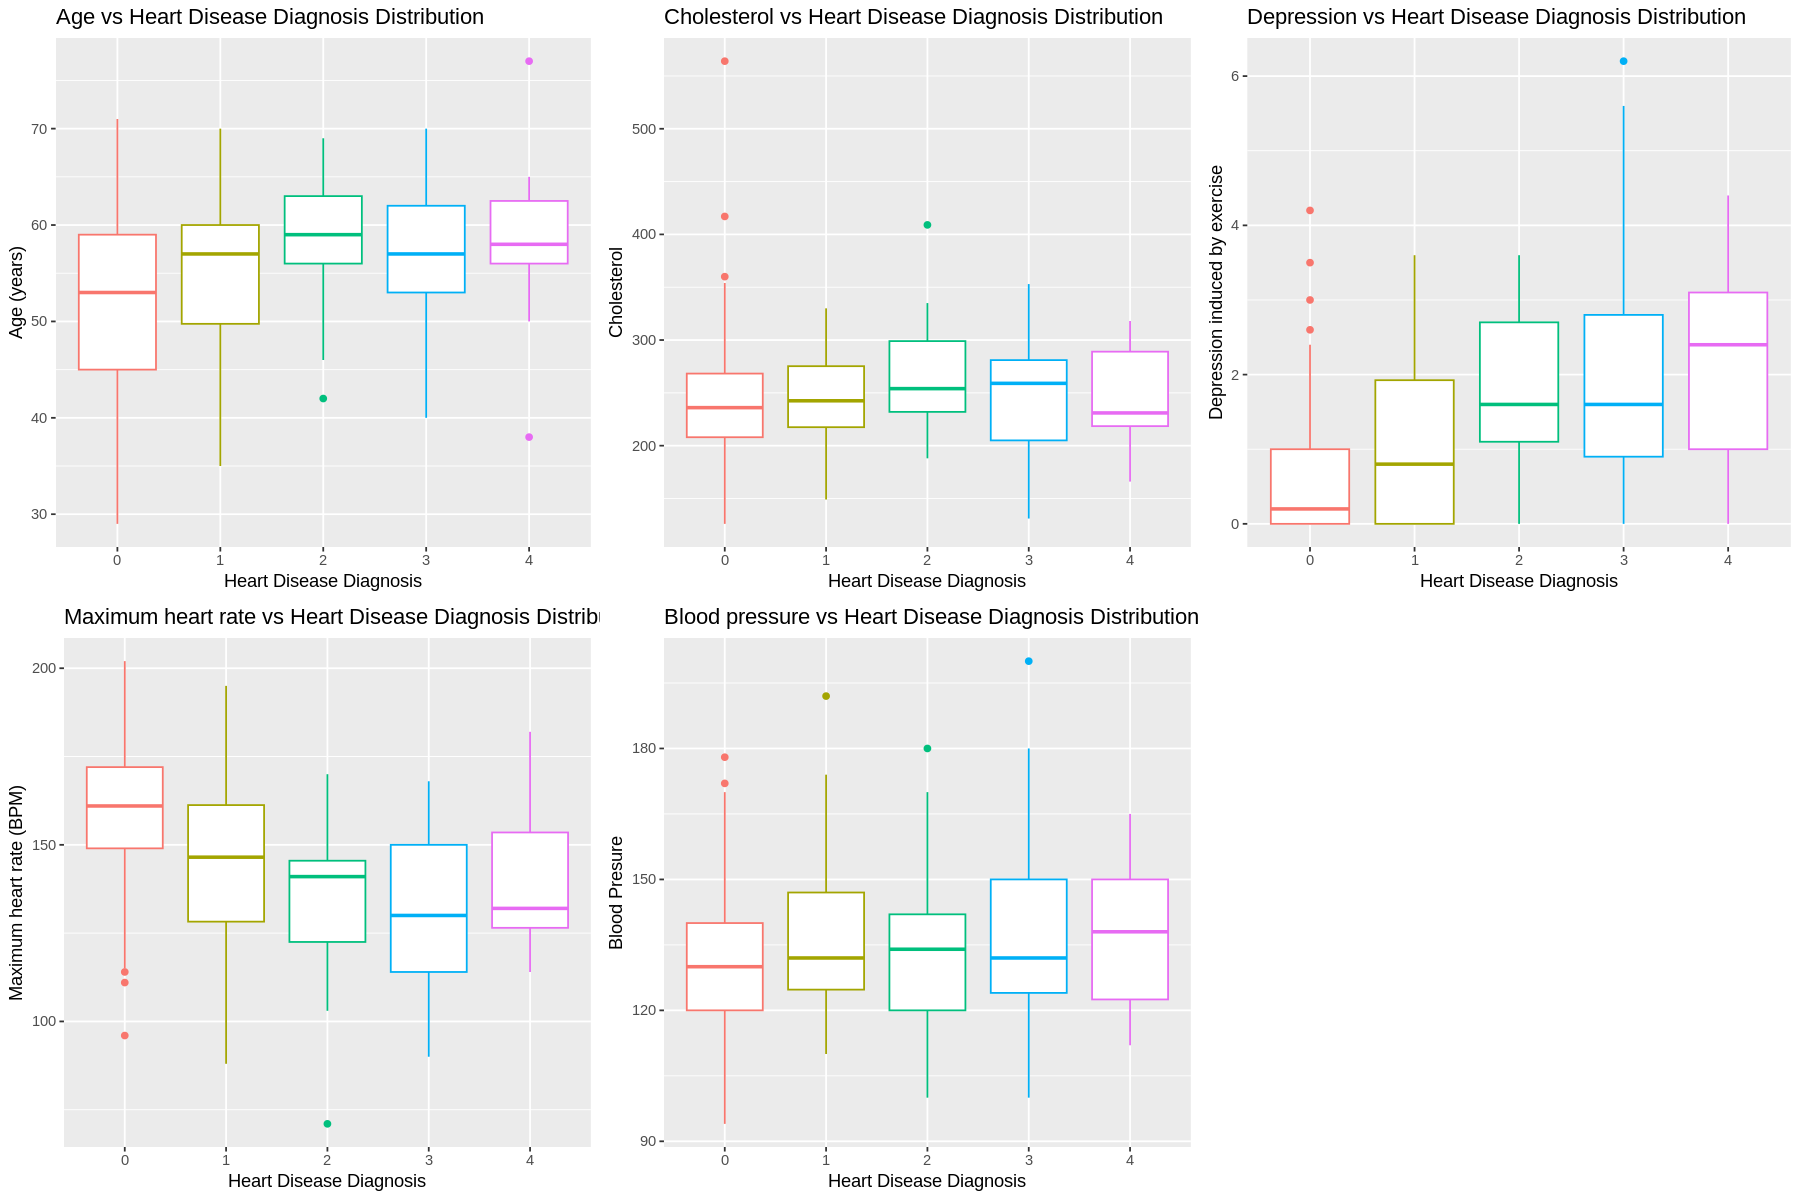

In [29]:
#age
diag_vs_age <- heart_training |>
    ggplot(aes(x = disease_diagnosis, y = age, color = disease_diagnosis)) +
    geom_boxplot(show.legend = FALSE) +
    labs(title = "Age vs Heart Disease Diagnosis Distribution",
        x = "Heart Disease Diagnosis", y = "Age (years)")

#cholesterol
diag_vs_chol <- heart_training |>
    ggplot(aes(x = disease_diagnosis, y = chol, color = disease_diagnosis)) +
    geom_boxplot(show.legend = FALSE) +
    labs(title = "Cholesterol vs Heart Disease Diagnosis Distribution",
        x = "Heart Disease Diagnosis", y = "Cholesterol")


#ST depression
diag_vs_depr <- heart_training |>
    ggplot(aes(x = disease_diagnosis, y = st_depr, color = disease_diagnosis)) +
    geom_boxplot(show.legend = FALSE) +
    labs(title = "Depression vs Heart Disease Diagnosis Distribution",
        x = "Heart Disease Diagnosis", y = "Depression induced by exercise")

#max heart rate
max_hr_vs_depr <- heart_training |>
    ggplot(aes(x = disease_diagnosis, y = max_hr, color = disease_diagnosis)) +
    geom_boxplot(show.legend = FALSE) +
    labs(title = "Maximum heart rate vs Heart Disease Diagnosis Distribution",
        x = "Heart Disease Diagnosis", y = "Maximum heart rate (BPM)")

#blood pressure
bp_vs_depr <- heart_training |>
    ggplot(aes(x = disease_diagnosis, y = trest_bps, color = disease_diagnosis)) +
    geom_boxplot(show.legend = FALSE) +
    labs(title = "Blood pressure vs Heart Disease Diagnosis Distribution",
        x = "Heart Disease Diagnosis", y = "Blood Presure")

options(repr.plot.width = 15, repr.plot.height = 10)
visualize <- plot_grid(diag_vs_age, diag_vs_chol, diag_vs_depr, max_hr_vs_depr, bp_vs_depr)

visualize

#### Figure 1: Distributions of Potential Predictors vs Response Variable

We used box plots to show the frequency distribution of our predictor variables (numerical variables) in our response variable (categorical variable). After seeing the distribution and range of values for each of the predictor variables, it appears that the ones which may be the weakest are trest_bps (blood pressure) and chol (cholesterol). This is because the medians stay mostly constant throughout the box plots for the two variables.

Therefore, we will use age, st_depr (ST depression induced by exercise), and max_hr (maximum heart rate) as our predictor variables. These variables seem like good predictors because the variety in their range suggests that they will have a significant influence on a patient's diagnosis.

#### Visualizing the Predictors

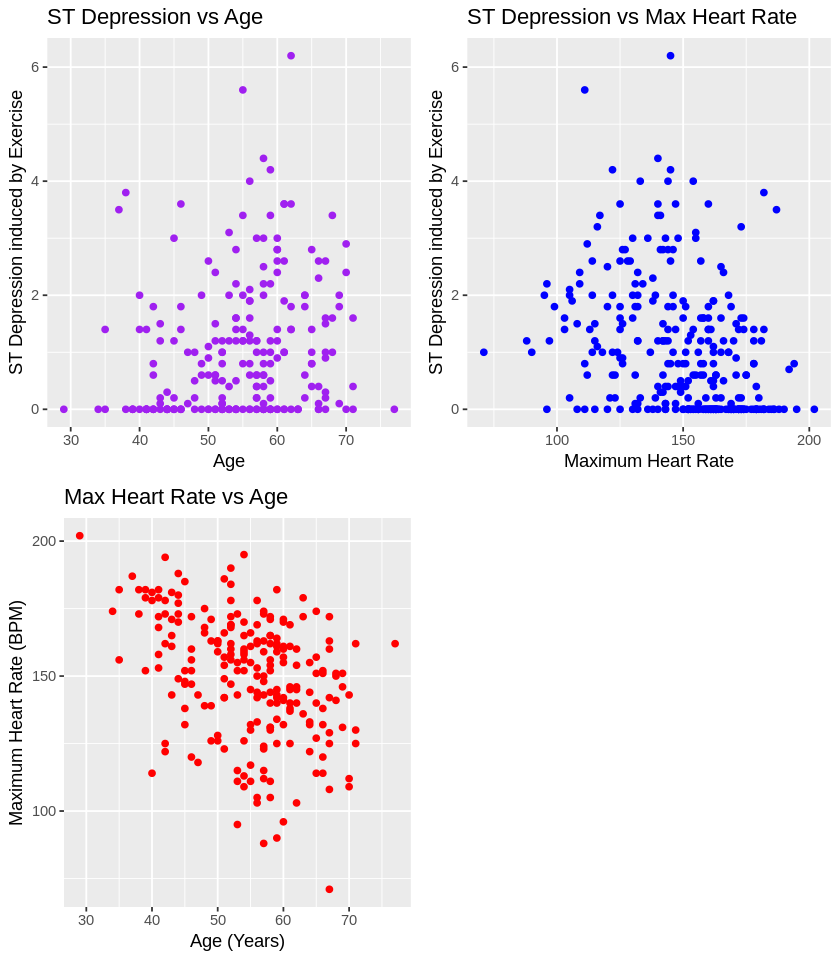

In [10]:
options(repr.plot.height = 8, repr.plot.width = 7)

st_depr_vs_age <- heart_training |>
    ggplot(aes(x = age, y = st_depr)) +
    geom_point(colour = "purple") +
    labs(title = "ST Depression vs Age",
        x = "Age", y = "ST Depression induced by Exercise")

max_hr_vs_depr <- heart_disease |>
    ggplot(aes(x = max_hr, y = st_depr)) +
    geom_point(colour = "blue") +
    labs(title = "ST Depression vs Max Heart Rate",
        x = "Maximum Heart Rate", y = "ST Depression induced by Exercise")


max_hr_vs_age <- heart_training |>
    ggplot(aes(x = age, y = max_hr)) +
    geom_point(colour = "red") +
    labs(title = "Max Heart Rate vs Age",
        x = "Age (Years)", y = "Maximum Heart Rate (BPM)")

predictor_plots <- plot_grid(st_depr_vs_age, max_hr_vs_depr, max_hr_vs_age)
predictor_plots

#### Figure 2: Predictor Plots

We used scatter plots to visualize our predictors against one another. As we can see above, most of these predictors do not have a distinct relationship that follows any strong linear trend. An exception to this may be the relationship in the Max Heart Rate vs ST Depression as there seems to be a decreasing relationship; however, the the plot is fairly cloudy so the relationship is not strong. Overall, the independence of the relationships that our predictors above have with one another suggest that we have wisely chosen our predictor variables, which will lower interference from collinearity. 

### E. Finding an optimal $K$ value 

In [11]:
unique(heart_training$disease_diagnosis)


[1] 0 4 1 2 3
Levels: 0 1 2 3 4

In [30]:
options(repr.plot.height = 6, repr.plot.width = 7)

heart_recipe <- recipe(disease_diagnosis ~ age + max_hr + st_depr, data = heart_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 

heart_recipe

heart_vfold <- vfold_cv(heart_training, v = 5, strata = disease_diagnosis)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
         set_engine("kknn") |>
         set_mode("classification")




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



[1] "Best K-Value:"


[1] 21 22

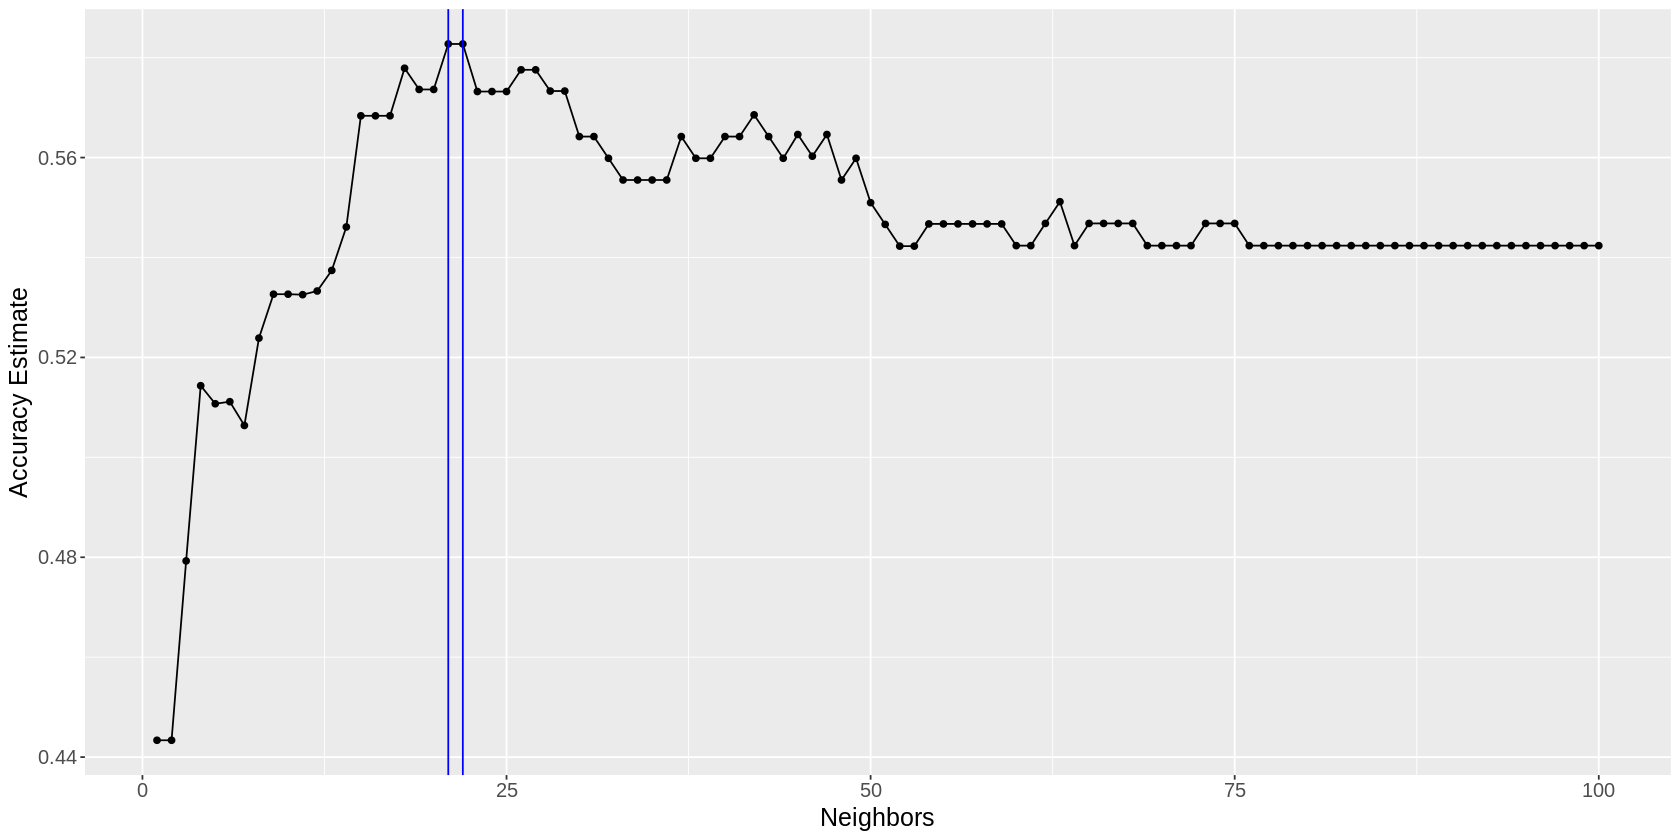

In [32]:
set.seed(120) 
options(repr.plot.width = 14, repr.plot.height = 7)

gridvals = tibble(neighbors = seq(from = 1, to = 100, by = 1))

heart_results <- workflow() |>
            add_recipe(heart_recipe) |>
            add_model(knn_spec) |>
            tune_grid(resamples = heart_vfold, grid = gridvals) |>
            collect_metrics()

# taking the best k-value
best_k <- heart_results |>
    filter(.metric == "accuracy") |>
    slice_max(mean) |>
    pull(neighbors)
print("Best K-Value:")
best_k

accuracies <- heart_results |>
            filter(.metric == "accuracy")

cross_val_plot <- accuracies |>
            ggplot(aes(x = neighbors, y = mean)) + 
                geom_point() +
                geom_line() +
                geom_vline(xintercept = best_k, colour = "blue") +
                labs(x = "Neighbors", y = "Accuracy Estimate") + 
                theme(text = element_text(size = 15))

cross_val_plot

#### Figure 3: Finding the Optimal $K$ Value for KNN Classification Using Cross Validation

To determine the optimal $K$ value for our KNN classification, we used our recipe to scale and center our predictors, then performed a 5-fold cross-validation and visualized the output. Based on the plot, we see that $K$=21 is the optimal $K$ value to provide a high accuracy estimate, so this is the value that we will use to retrain our classifier on the entire training data set. 

In [36]:
#Retraining our training data with the optimal K value (21)
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 21) |>
        set_engine("kknn") |>
        set_mode("classification")

heart_fit <- workflow() |>
        add_recipe(heart_recipe) |>
        add_model(heart_spec) |>
        fit(data = heart_training)
heart_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(21,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4088889
Best kernel: rectangular
Best k: 21

### F. Evaluation of Model

Now we apply our trained model to the testing set.

.metric,.estimate
<chr>,<dbl>
accuracy,0.5324675


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


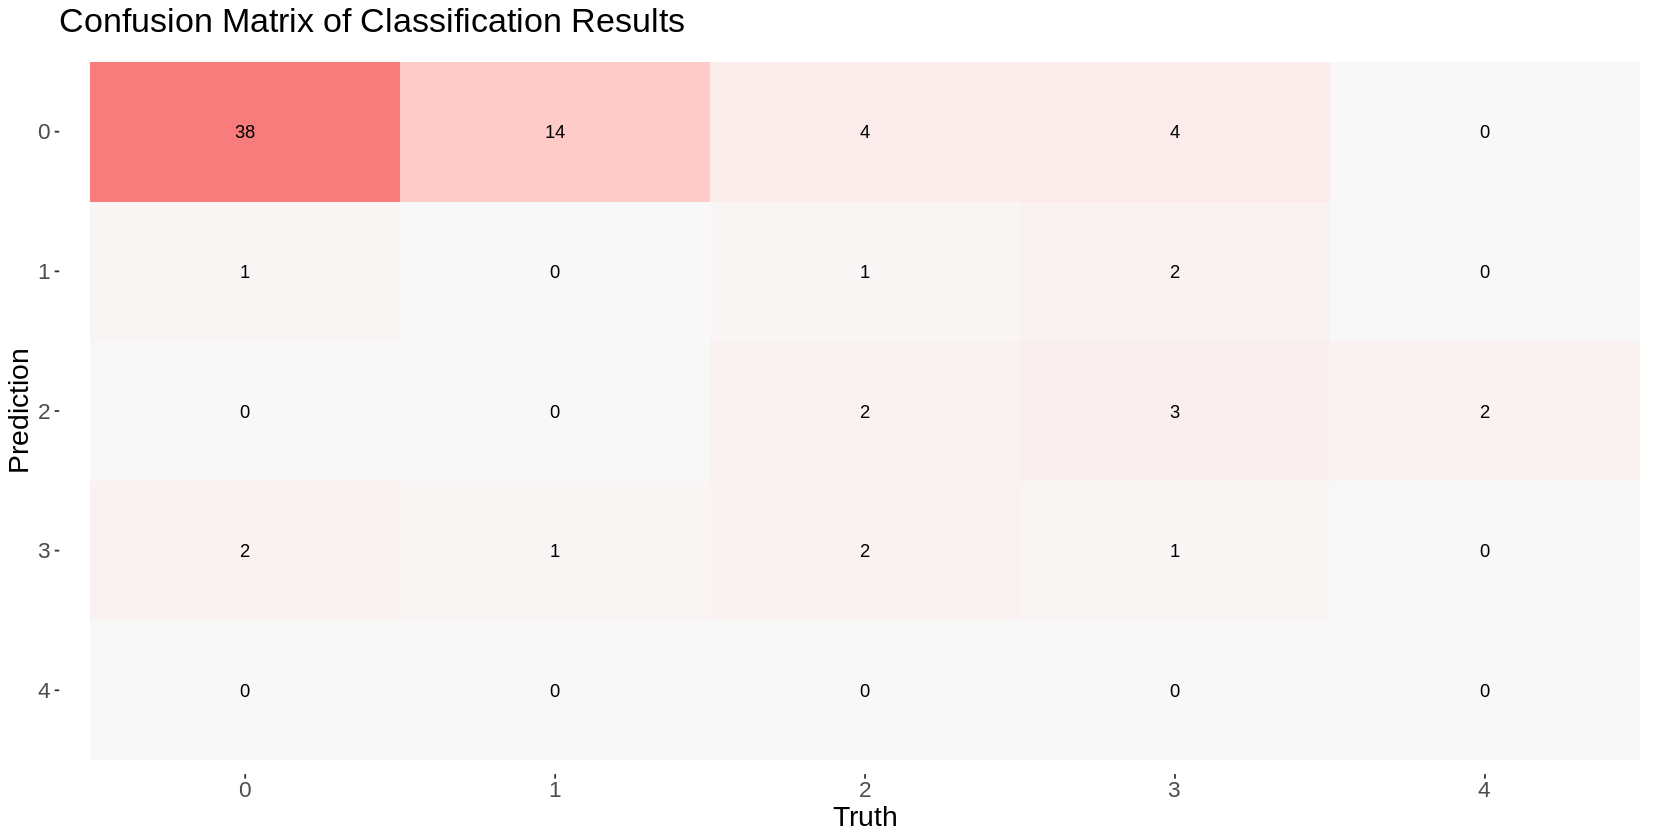

In [34]:
# Finding the accuracy of our prediction

heart_predictions <- predict(heart_fit, heart_testing) |>
        bind_cols(heart_testing)

heart_metrics <- heart_predictions |>
        metrics(truth = disease_diagnosis, estimate = .pred_class) |>
        filter(.metric == "accuracy") |>
        select(.metric, .estimate)
heart_metrics

heart_conf_mat <- heart_predictions |>
        conf_mat(truth = disease_diagnosis, estimate = .pred_class)

heart_matrix <- heart_conf_mat |>
        autoplot(type = "heatmap") +
        scale_fill_gradient(low = "#f8f8f8", high = "#f87c7c") + 
        theme(text = element_text(size = 17)) + 
        labs(title = "Confusion Matrix of Classification Results")
heart_matrix

#### Figure 4: Model Accuracy and Confusion Matrix

Here, we applied our training model to the testing set and determined that our model has a prediction accuracy of 53.25% when classifying objects in the testing set.

We also made a confusion matrix to display when the response variable was predicted either correctly or incorrectly in our testing set. Based on this output, we can we that most of the successful predictions occurred when the person did not have a heart disease diagnosis. This could be because of an overwhelming number of data points that indicated the absence of heart disease causing the model to overfit for that diagnosis.

### G. Checking Our Predictors with KNN Predictions

Since our accuracy from section F is not all that great, we will try to take a closer look at our predictors, max_hr (Max Heart Rate), st_depr (ST Depression Induced by Excercise), and age. We will use the KNN-classification model to check the accuracies of these individual predictors against testing data, to compare their performances.
* We have created a new training-testing split of 75% to 25%
* We created recipes for each predictor
* We collected the results for each predictor using `workflow()`

In [16]:
set.seed(210) 
heart_split_2 <- initial_split(heart_select, prop = 0.75, strata = disease_diagnosis)
heart_training_2 <- training(heart_split_2)
heart_testing_2 <- testing(heart_split_2)

In [17]:
set.seed(120) 

hr_recipe <- recipe(disease_diagnosis ~ max_hr, data = heart_training_2) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 

age_recipe <- recipe(disease_diagnosis ~ age, data = heart_training_2) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 

depr_recipe <- recipe(disease_diagnosis ~ st_depr, data = heart_training_2) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 

In [18]:
set.seed(190)
#To reduce the size of the computation, we check KNN-
gridvals_2 = tibble(neighbors = seq(from = 1, to = 50, by = 1))

heart_vfold_2 <- vfold_cv(heart_training_2, v = 5, strata = disease_diagnosis)

hr_results <- workflow() |>
            add_recipe(hr_recipe) |>
            add_model(knn_spec) |>
            tune_grid(resamples = heart_vfold_2, grid = gridvals_2) |>
            collect_metrics()

depr_results <- workflow() |>
            add_recipe(depr_recipe) |>
            add_model(knn_spec) |>
            tune_grid(resamples = heart_vfold_2, grid = gridvals_2) |>
            collect_metrics()

age_results <- workflow() |>
            add_recipe(age_recipe) |>
            add_model(knn_spec) |>
            tune_grid(resamples = heart_vfold_2, grid = gridvals_2) |>
            collect_metrics()

→ A | warning: No observations were detected in `truth` for level(s): '4'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x1



→ A | warning: No observations were detected in `truth` for level(s): '4'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x1



→ A | warning: No observations were detected in `truth` for level(s): '4'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





The next step is to find and record the optimal $k$ values for the nearest neighbours algorithm for each predictor.

In [19]:
# taking the best k-value of Max Heartrate
best_k_hr <- hr_results |>
    filter(.metric == "accuracy") |>
    slice_max(mean) |>
    pull(neighbors)
print("Best K-Value For Max Heart Rate:")
best_k_hr


# taking the best k-value for ST Depression Induced by Excercise
best_k_depr <- depr_results |>
    filter(.metric == "accuracy") |>
    slice_max(mean) |>
    pull(neighbors)
print("Best K-Value For ST Depression:")
best_k_depr

# taking the best k-value for Age
best_k_age <- age_results |>
    filter(.metric == "accuracy") |>
    slice_max(mean) |>
    pull(neighbors)
print("Best K-Value For Age:")
best_k_age

[1] "Best K-Value For Max Heart Rate:"


[1] 48

[1] "Best K-Value For ST Depression:"


[1] 11

[1] "Best K-Value For Age:"


[1] 24

Here are the following $k$ values we will use:
* 48 neighbours for Max Heart Rate
* 11 neighbours for ST Depression
* 24 neighbours for Age

In [20]:
hr_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 48) |>
        set_engine("kknn") |>
        set_mode("classification")

depr_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 11) |>
        set_engine("kknn") |>
        set_mode("classification")

age_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 24) |>
        set_engine("kknn") |>
        set_mode("classification")

Our remaining steps are to fit our model and create predictions using the testing data. \
After the predictions, we will take a look at the accuracies to see how the models performed.

In [21]:
hr_fit <- workflow() |>
        add_recipe(hr_recipe) |>
        add_model(hr_spec) |>
        fit(data = heart_training_2)

depr_fit <- workflow() |>
        add_recipe(depr_recipe) |>
        add_model(depr_spec) |>
        fit(data = heart_training_2)

age_fit <- workflow() |>
        add_recipe(age_recipe) |>
        add_model(age_spec) |>
        fit(data = heart_training_2)

In [37]:
hr_predictions <- predict(hr_fit, heart_testing_2) |>
        bind_cols(heart_testing)

depr_predictions <- predict(depr_fit, heart_testing_2) |>
        bind_cols(heart_testing_2)

age_predictions <- predict(age_fit, heart_testing_2) |>
        bind_cols(heart_testing_2)

hr_metrics <- hr_predictions |>
        metrics(truth = disease_diagnosis, estimate = .pred_class) |>
        filter(.metric == "accuracy") |>
        select(.metric, .estimate)
print("Table 7.0: Max Heart Rate Model Accuracy")
hr_metrics

depr_metrics <- depr_predictions |>
        metrics(truth = disease_diagnosis, estimate = .pred_class) |>
        filter(.metric == "accuracy") |>
        select(.metric, .estimate)
print("Table 7.1: ST Depression Model Accuracy")
depr_metrics

age_metrics <- age_predictions |>
        metrics(truth = disease_diagnosis, estimate = .pred_class) |>
        filter(.metric == "accuracy") |>
        select(.metric, .estimate)
print("Table 7.2: Age Model Accuracy")
age_metrics

[1] "Table 7.0: Max Heart Rate Model Accuracy"


.metric,.estimate
<chr>,<dbl>
accuracy,0.4285714


[1] "Table 7.1: ST Depression Model Accuracy"


.metric,.estimate
<chr>,<dbl>
accuracy,0.5194805


[1] "Table 7.2: Age Model Accuracy"


.metric,.estimate
<chr>,<dbl>
accuracy,0.5064935


#### Tables 7.0 - 7.2: Predictor Accuracies
We observed that the three predictors we use, max heart rate, ST depression induced by exercise, and age, have accuracies of 42.86%, 51.95%, and 50.65%, respectively. \
This informed us that all of our chosen predictors perform poorly when predicting against this dataset using the KNN classification method. \
Since none of these predictors have a remarkable accuracy, it makes sense that our accuracy when using all three of these predictors was not optimal either.

## 4. Discussion

Upon choosing age, max heart rate, and ST depression induced by exercise as our three predictor variables, we trained our model and found that a K value of 21 had the greatest accuracy estimate. We applied our trained model on the testing set to find that the model could accurately classify level of heart disease 53.25% of the time. This is admittedly a very poor model, especially considering the application. This is not a fault in our code, but rather a drawback of the dataset. As noted previously, there is a clear imbalance in the number of data points between the different levels of heart disease, with there being an abundance of level 0 heart disease and barely any level 4 heart disease. This resulted in a model that had sufficient training in classifying level 0 cases, but was ill-equipped to correctly classify more severe cases (see confusion matrix in Figure 4). This was unfortunately something we expected, but served challenging to overcome given our current time and resources.

To better approach this in the future, we could invest more resources into sourcing a more robust dataset that has more data points for all levels of heart disease, ensuring that our model can be trained with adequate access to all cases. Once our future model has an acceptable predictor accuracy, it could have profound implications in the medical community, leading to a greater understanding of which factors correlate strongly to heart disease. Healthcare professionals would place greater emphasis on monitoring our predictor variables of age, max heart rate, and ST depression induced by exercise, as these will have been proven to be linked to heart disease. 

#### Future questions could include:  
* How applicable are these findings to different populations around the world?
* How can we alleviate the effects of max heart rate and ST depression induced by exercise to weaken their link to heart disease?
* Are there any other variables at play beyond our predictor variables that may be more closely linked to heart disease?

## References

Centers for Disease Control and Prevention. (2023, May 15). *Heart Disease  Facts*. Heart Disease. https://www.cdc.gov/heartdisease/facts.htm#:~:text=Coronary%20heart%20disease%20is%20the,killing%20375%2C476%20people%20in%202021.&text=About%201%20in%2020%20adults,have%20CAD%20(about%205%25).&text=In%202021%2C%20about%202%20in,less%20than%2065%20years%20old. 

Government of Canada. (2022, July 28). *Heart Disease in Canada*. Public Health Agency of Canada. https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html 

 
Janosi, Andras, Steinbrunn, William, Pfisterer, Matthias, and Detrano, Robert. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

Mayo Foundation for Medical Education and Research. (2022, August 25). *Heart disease*. Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118 